In [584]:
###import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Model Selection
from sklearn.model_selection import train_test_split

## Metrics
from sklearn.metrics import accuracy_score

## Preprocessing 
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score, cross_val_predict
import joblib
from scipy.stats import stats
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score , recall_score, f1_score ,classification_report
from sklearn.metrics import confusion_matrix,precision_recall_curve

### Load the Data ana Look at the big picture

In [586]:
file = os.path.join(os.getcwd(), r"C:\Users\Eslam\Desktop\customer_churn_dataset\customer_churn_dataset-training-master.csv")
train = pd.read_csv(file)

path = os.path.join(os.getcwd(), r"C:\Users\Eslam\Desktop\customer_churn_dataset\customer_churn_dataset-testing-master.csv")
test = pd.read_csv(path)

df = pd.concat( objs = [train,test],ignore_index=True)

In [587]:
### showing dataframe
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [588]:
## check the info (nulls and datatypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [589]:
### check number of rows & column
df.shape

(505207, 12)

In [590]:
## drop CustomerID from df
df.drop(['CustomerID'],axis=1,inplace=True)

In [591]:
## show statistics of the df
## target (Churn)
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [592]:
df["Subscription Type"].unique()

array(['Standard', 'Basic', 'Premium', nan], dtype=object)

In [593]:
df["Contract Length"].unique()

array(['Annual', 'Monthly', 'Quarterly', nan], dtype=object)

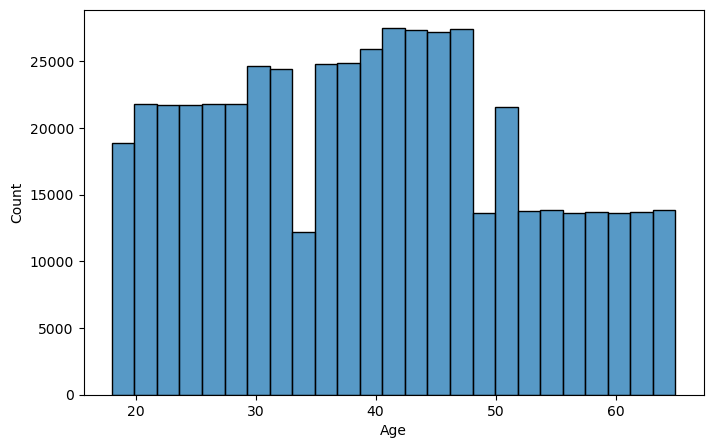

In [594]:
plt.figure(figsize=(8,5))
sns.histplot(data = df ,x ='Age',bins=25 )
plt.show()

In [595]:
Gender_values = df['Gender'].value_counts()
Gender_values

Gender
Male      280273
Female    224933
Name: count, dtype: int64

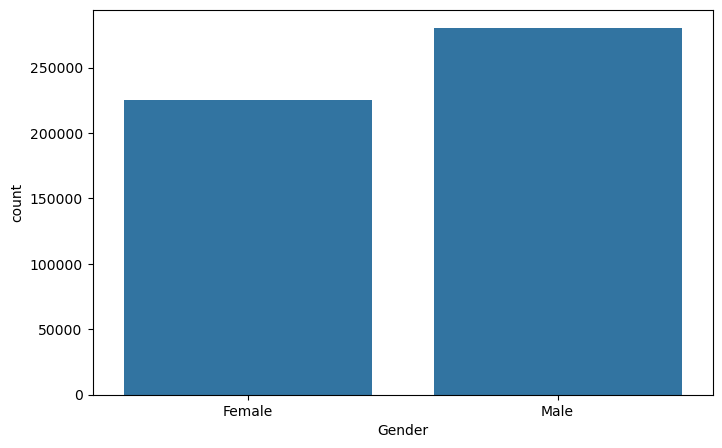

In [596]:
plt.figure(figsize=(8,5))
sns.countplot(data = df ,x ='Gender' );
plt.show()

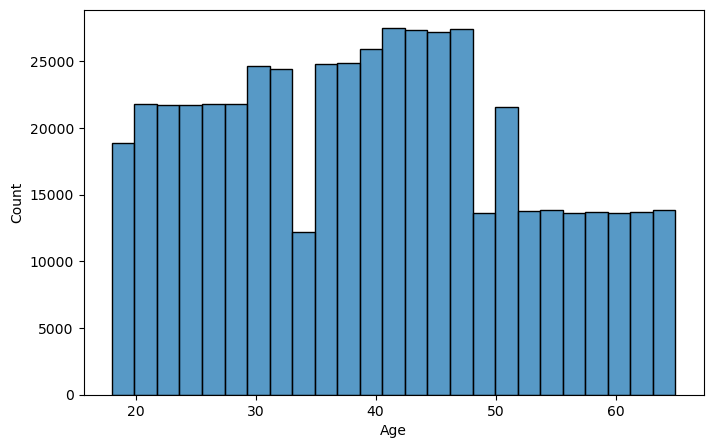

In [597]:
plt.figure(figsize=(8,5))
sns.histplot(data = df ,x ='Age',bins=25 );
plt.show()

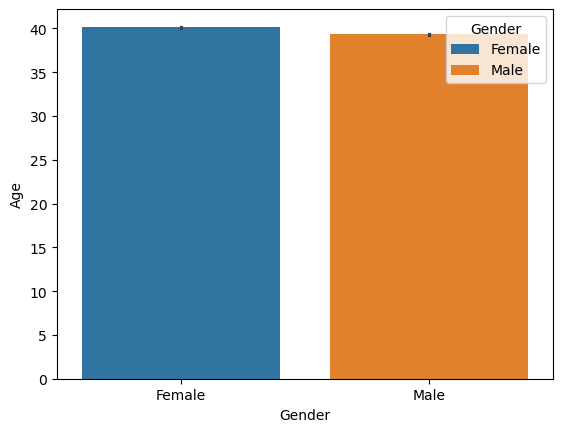

In [598]:
sns.barplot(x='Gender', y='Age', data=df, hue='Gender')
plt.show()

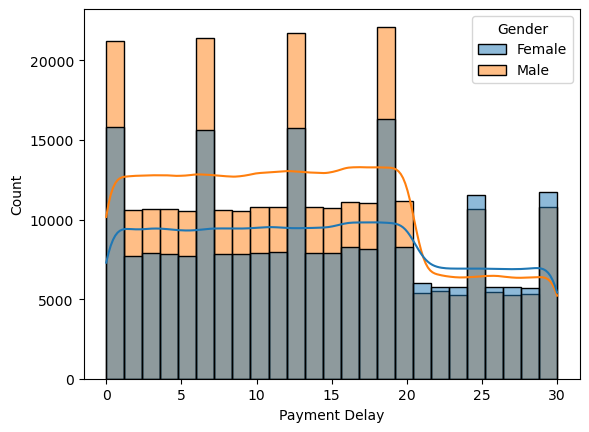

In [599]:
sns.histplot(x='Payment Delay', data=df, kde=True, hue='Gender',bins = 25)
plt.show()

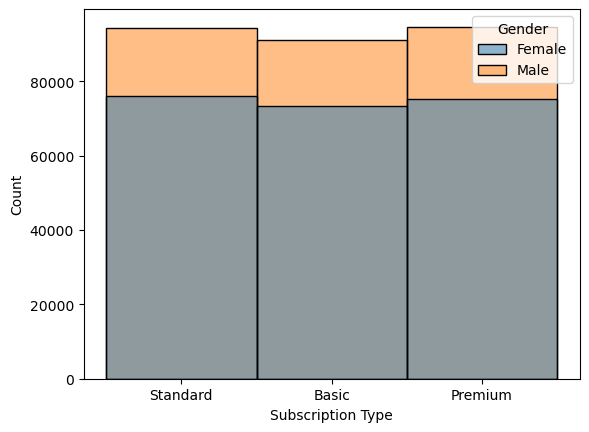

In [600]:
sns.histplot(x='Subscription Type', data=df, hue='Gender',bins = 25)
plt.show()

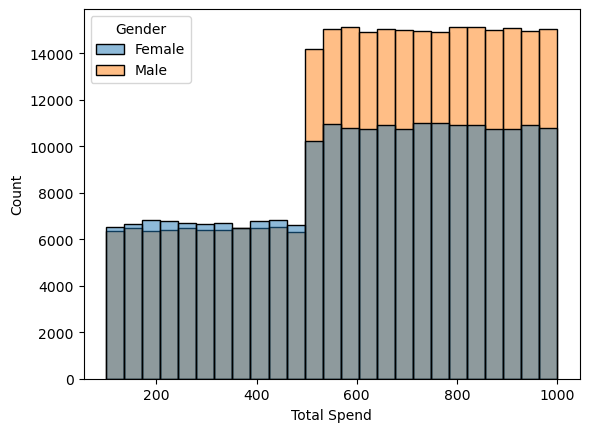

In [601]:
sns.histplot(x='Total Spend', data=df, hue='Gender',bins = 25)
plt.show()

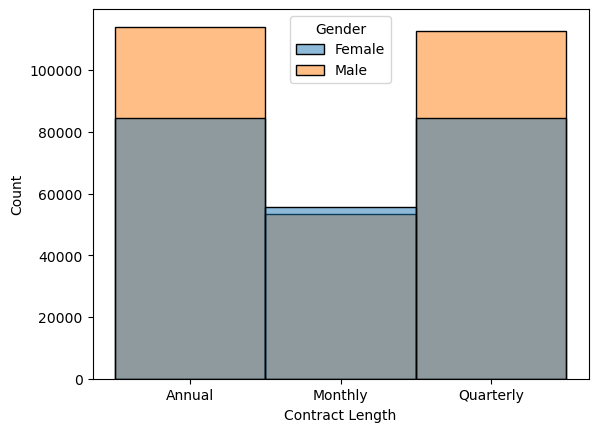

In [602]:
sns.histplot(x='Contract Length', data=df, hue='Gender',bins = 25)
plt.show()

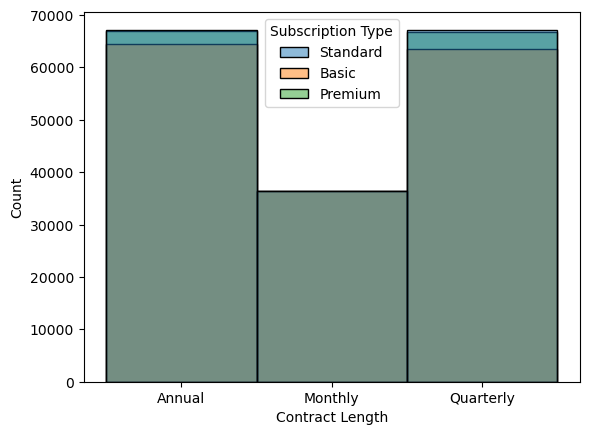

In [603]:
sns.histplot(x='Contract Length', data=df, hue='Subscription Type',bins = 20)
plt.show()

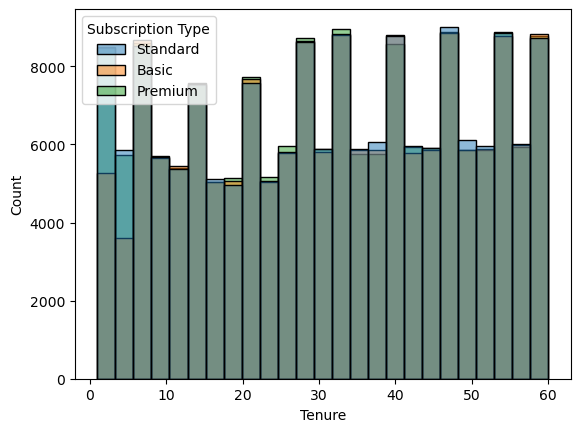

In [604]:
sns.histplot(x='Tenure', data=df, hue='Subscription Type',bins = 25)
plt.show()

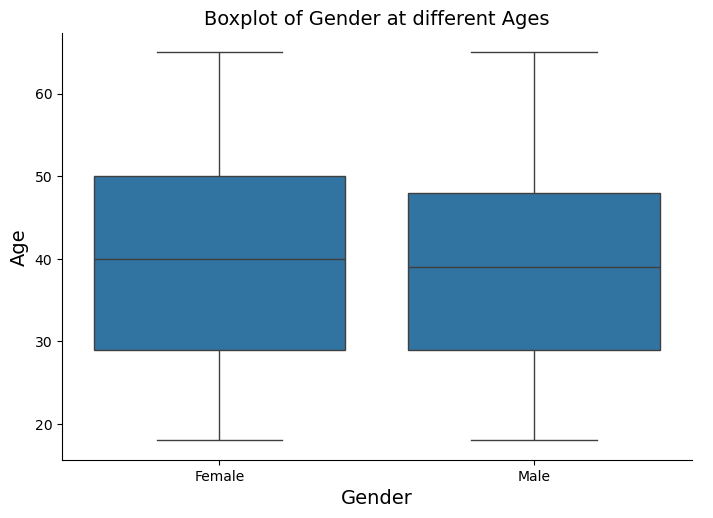

In [605]:
sns.catplot(y='Age', x='Gender', data=df, kind='box', height=5, aspect=1.4)
plt.title('Boxplot of Gender at different Ages', fontsize=14, c='k')
plt.xlabel('Gender', fontsize=14, c='k')
plt.ylabel('Age', fontsize=14, c='k')
plt.show()

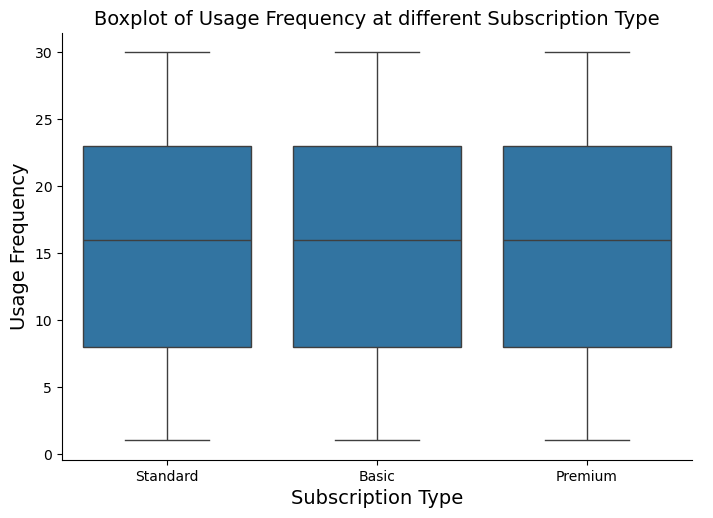

In [606]:
sns.catplot(y='Usage Frequency', x='Subscription Type', data=df, kind='box', height=5, aspect=1.4)
plt.title('Boxplot of Usage Frequency at different Subscription Type', fontsize=14, c='k')
plt.xlabel('Subscription Type', fontsize=14, c='k')
plt.ylabel('Usage Frequency', fontsize=14, c='k')
plt.show()

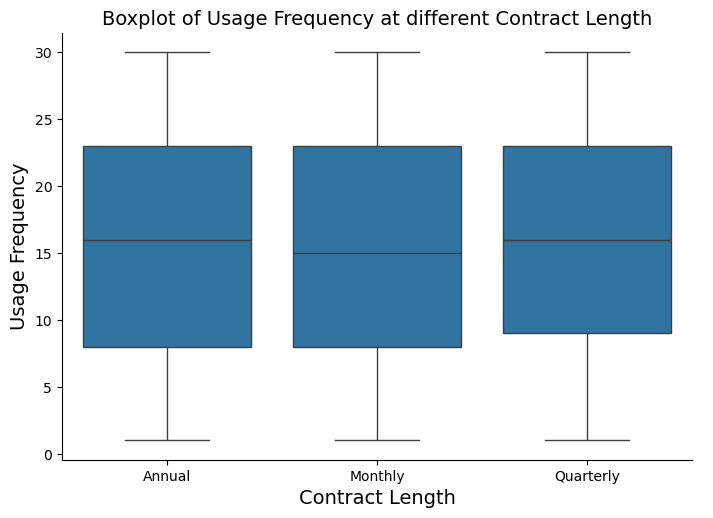

In [607]:
sns.catplot(y='Usage Frequency', x='Contract Length', data=df, kind='box', height=5, aspect=1.4)
plt.title('Boxplot of Usage Frequency at different Contract Length', fontsize=14, c='k')
plt.xlabel('Contract Length', fontsize=14, c='k')
plt.ylabel('Usage Frequency', fontsize=14, c='k')
plt.show()

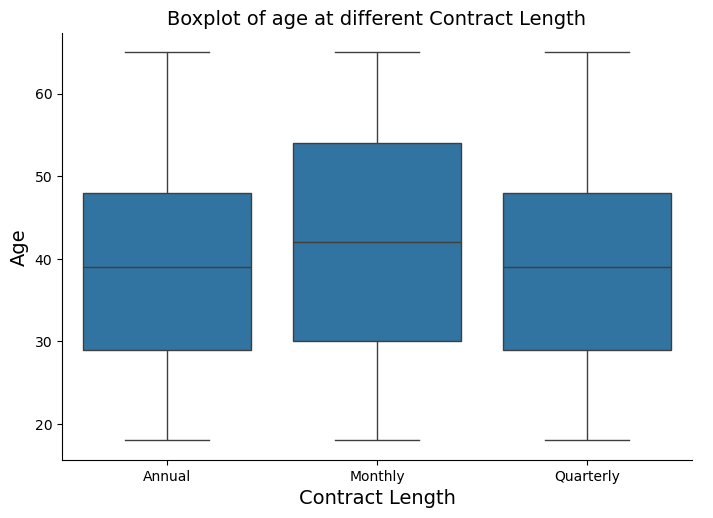

In [608]:
sns.catplot(y='Age', x='Contract Length', data=df, kind='box', height=5, aspect=1.4)
plt.title('Boxplot of age at different Contract Length', fontsize=14, c='k')
plt.xlabel('Contract Length', fontsize=14, c='k')
plt.ylabel('Age', fontsize=14, c='k')
plt.show()

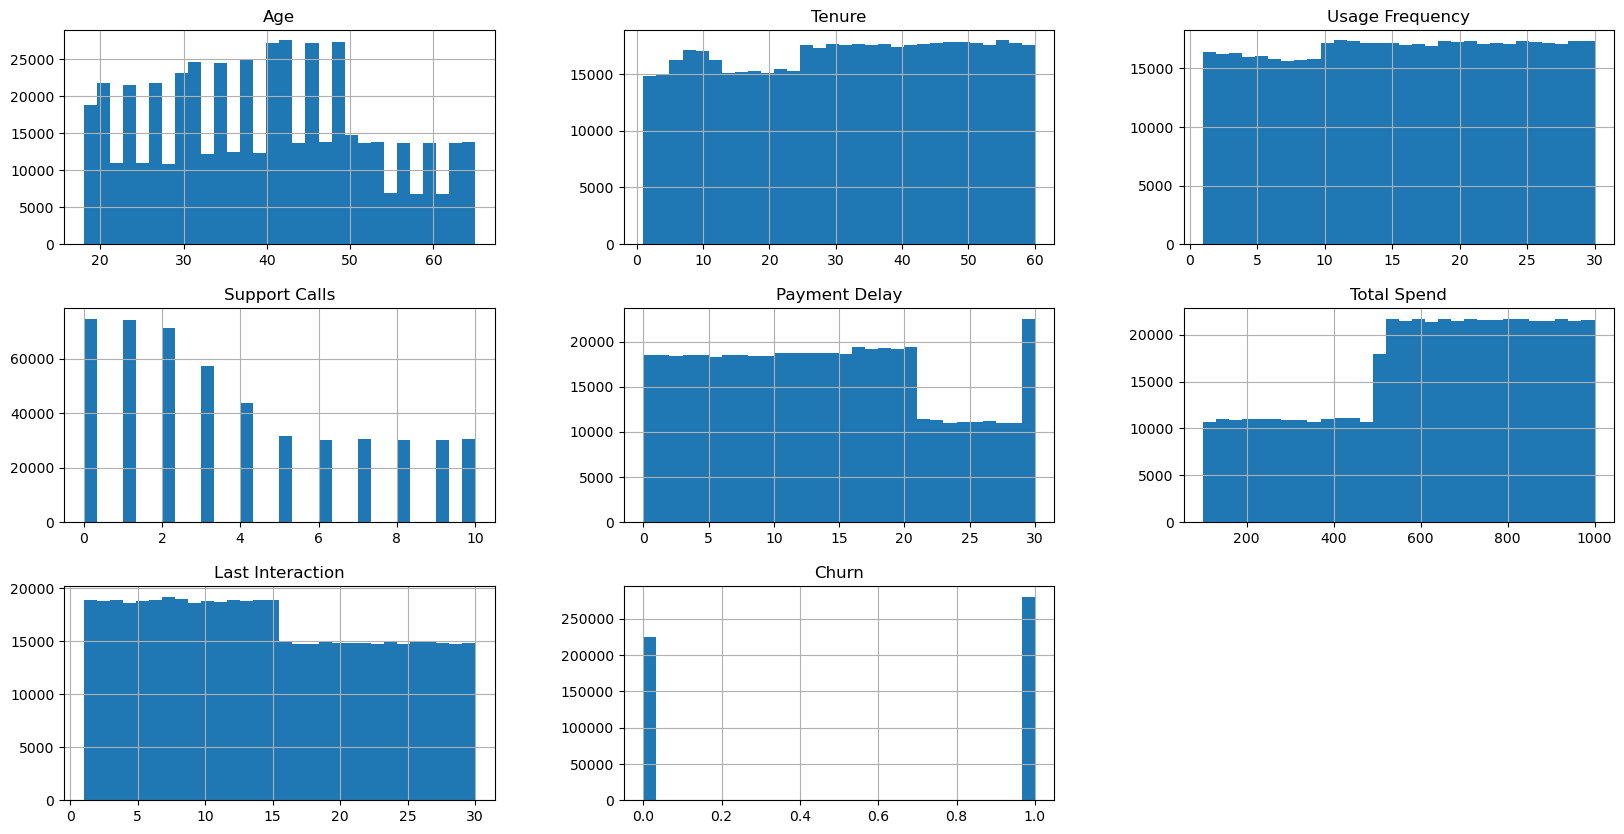

In [609]:
df.hist(bins=30, figsize=(20,10))
plt.show()

In [610]:
def categorical_visualization(col):
    plt.subplot(1,2,1)
    sns.countplot(x=col,data=df)
    plt.subplot(1,2,2)
    df[col].value_counts().plot(kind='pie',autopct='%0.2f%%')
    plt.tight_layout()
    plt.show()
    
    
def numerical_visualization(col):
    plt.subplot(1,2,1)
    sns.kdeplot(x=col,data=df)
    plt.grid()
    plt.subplot(1,2,2)
    sns.boxplot(x=col,data=df)
    plt.tight_layout()
    plt.show()

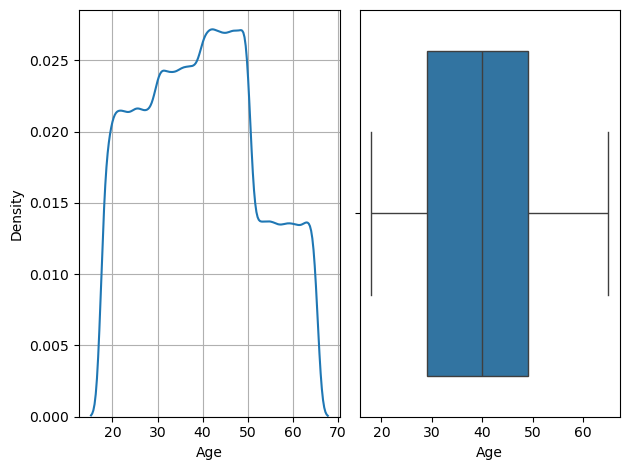

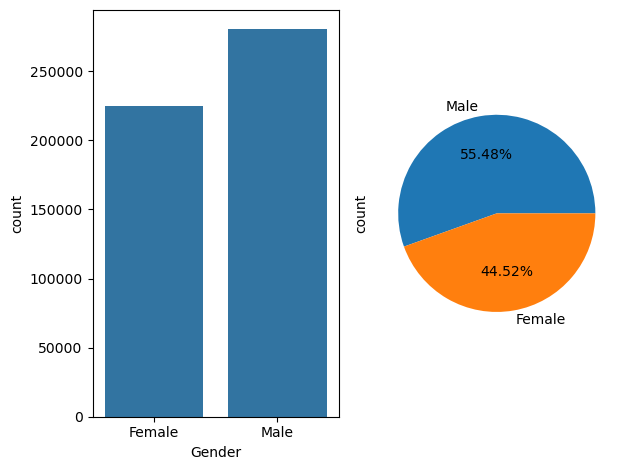

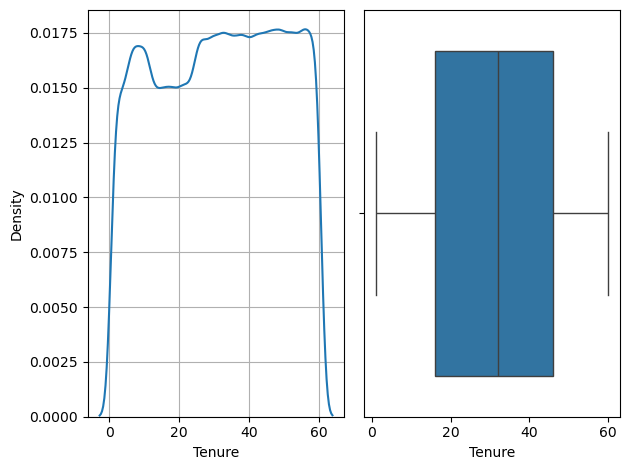

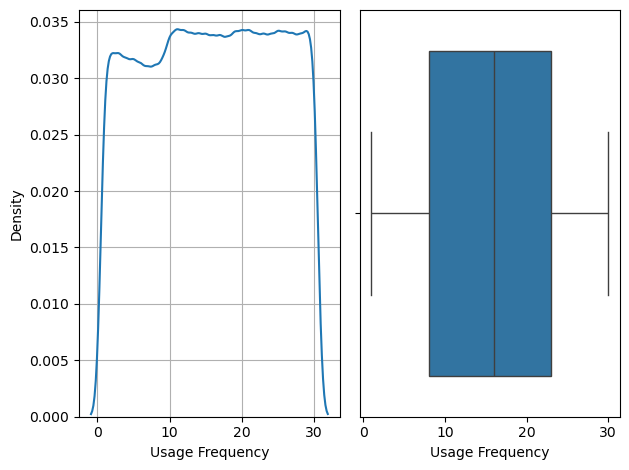

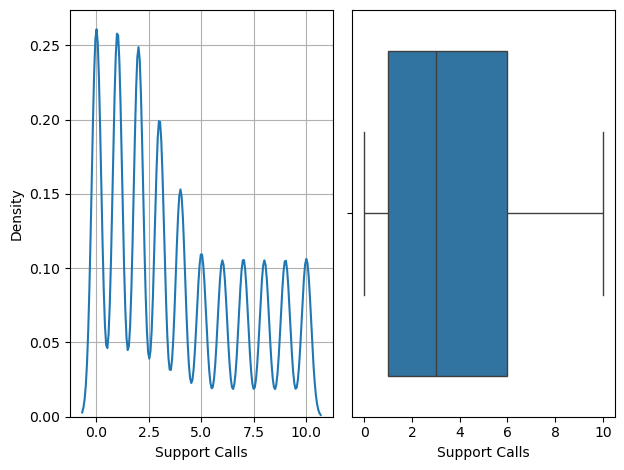

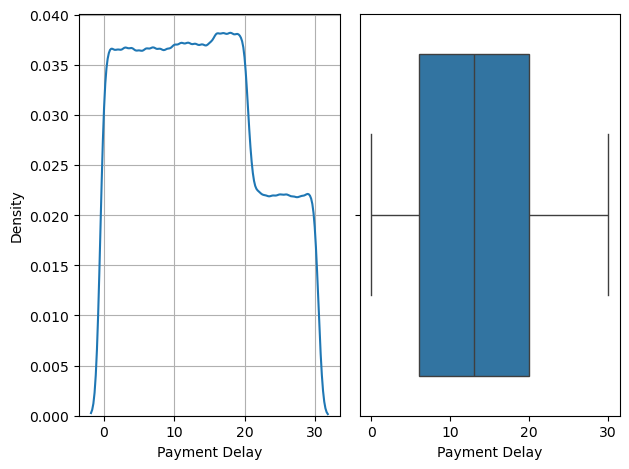

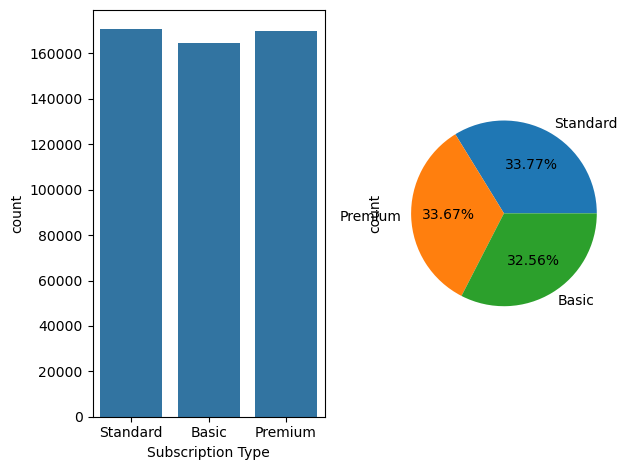

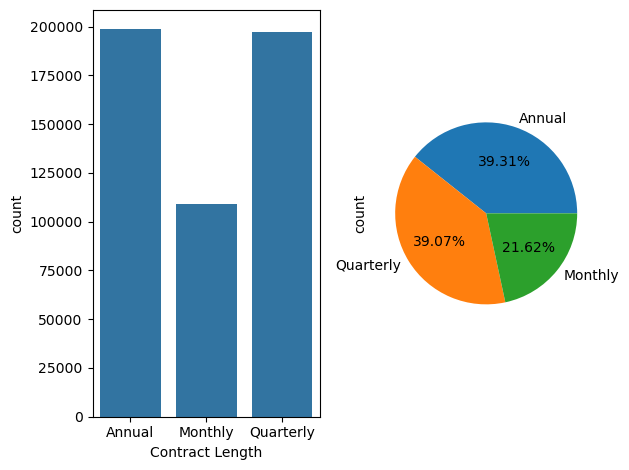

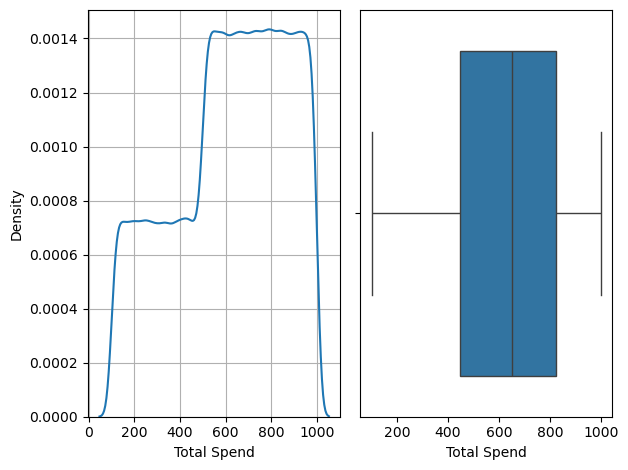

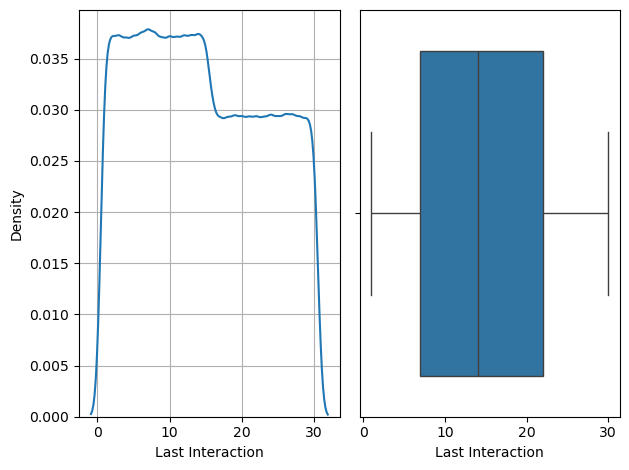

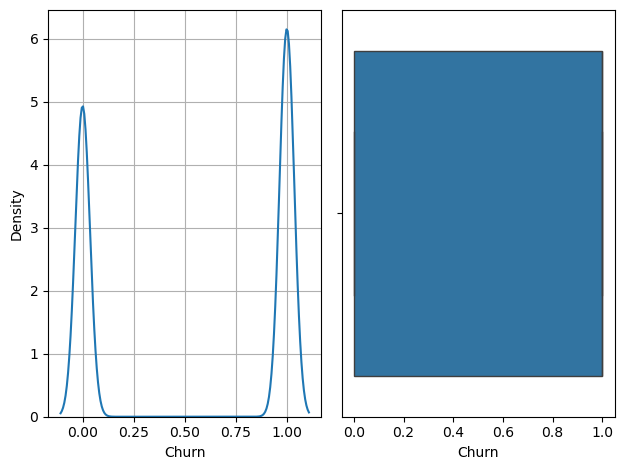

In [611]:
for i in df.columns:
    if df[i].dtype=='object':
        categorical_visualization(i)
    else:
        numerical_visualization(i)

<Axes: >

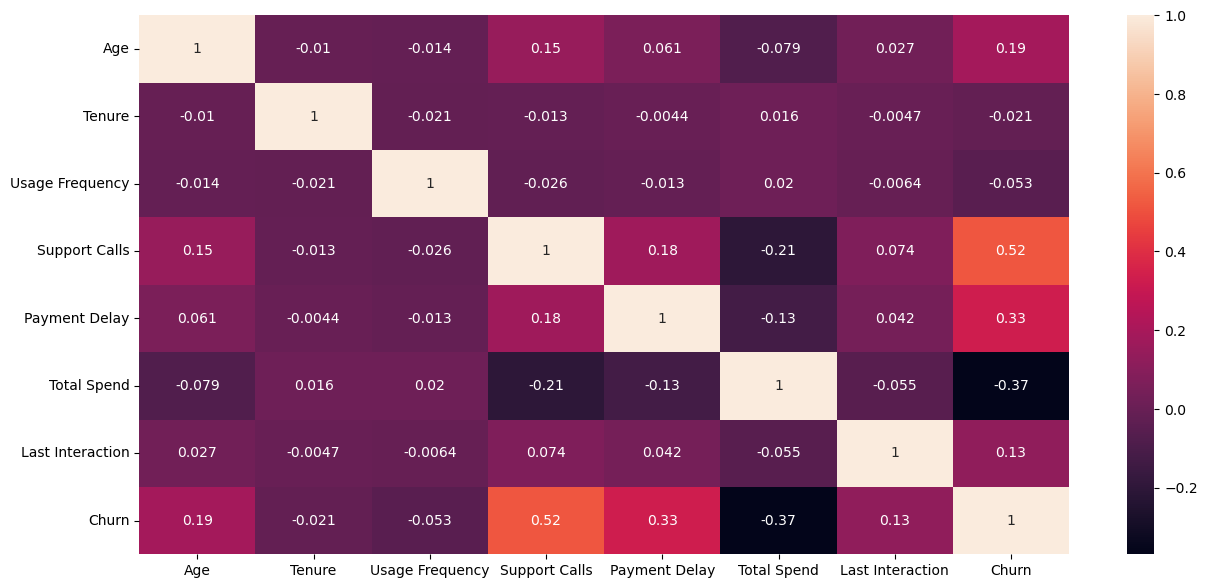

In [612]:
## Checking for correlation
plt.figure(figsize=(15,7))
sns.heatmap(data = df.corr(numeric_only = True),annot=True)

### `Preprocessing`


In [614]:
### Split the Dataset to Features and Target
X = df.drop(columns=['Churn'], axis=1)
y = df['Churn']

In [615]:
X.dropna(axis= 0,inplace=True)
y.dropna(axis= 0,inplace=True)

In [616]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X , y, test_size=0.15, shuffle=True, random_state=123)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full , y_train_full, test_size=0.20, shuffle=True, random_state=124)

print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_valid shape -- ', X_valid.shape)
print('y_valid shape -- ', y_valid.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (343540, 10)
y_train shape --  (343540,)
X_valid shape --  (85885, 10)
y_valid shape --  (85885,)
X_test shape --  (75781, 10)
y_test shape --  (75781,)


In [617]:
## Separete the columns according to type (numerical or categorical)
num_cols = [col for col in  X_train.columns 
             if X_train[col].dtype in ['float64', 'int64']]

categ_cols = [col for col in  X_train.columns 
                if X_train[col].dtype not in ['float64', 'int64']]

print('Numerical Columns : \n', num_cols)
print('**'*30)
print('Categorical Columns : \n', categ_cols)

Numerical Columns : 
 ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
************************************************************
Categorical Columns : 
 ['Gender', 'Subscription Type', 'Contract Length']


In [618]:
## We can get much much easier like the following
## numerical pipeline
num_pipeline = Pipeline([
                    ('selector', DataFrameSelector(num_cols)),    ## select only these columns
                    ('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler())])

## categorical pipeline
categ_pipeline = Pipeline(steps=[
            ('selector', DataFrameSelector(categ_cols)),    ## select only these columns
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse_output=False))])

## concatenate both two pipelines
total_pipeline = FeatureUnion(transformer_list=[
                                ('num_pip', num_pipeline),
                                ('categ_pipeline', categ_pipeline)])

## deal with (total_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_final = total_pipeline.fit_transform(X_train)
X_valid_final = total_pipeline.transform(X_valid)
X_test_final = total_pipeline.transform(X_test)   

### `XGBOOST`

In [620]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic',   ## The most one according to your task (here, Multiclass class.)
                            learning_rate=0.01,           ## eta or learning_rate 
                            n_estimators=200,             ## number of trees
                            )     
xgb_clf.fit(X_train_final, y_train)  ## train, deal with it as an ordinary model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [621]:
## Using cross validation for prediction and evaluation
acc_scores_xgboost = cross_val_score(estimator=xgb_clf, X =X_train_final, y=y_train, cv=5, n_jobs=-1, scoring='accuracy')
print(f'Accuracy (Mean) scores using "XGBoost" -- {acc_scores_xgboost.mean():.3f}', )

Accuracy (Mean) scores using "XGBoost" -- 0.924


In [622]:
## Prediction using cross validation
y_pred_xgb = cross_val_predict(estimator=xgb_clf, X=X_train_final, y=y_train, cv=5, n_jobs=-1, method='predict')
accuracy_score(y_train,y_pred_xgb)

0.924084531641148

In [623]:
### accuracy_score  y
y_pred_test = xgb_clf.predict(X_valid_final)
accuracy_score(y_valid,y_pred_test)

0.9247132793852244

In [624]:
class_repo = classification_report(y_valid,y_pred_test)
print(class_repo)

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91     38249
         1.0       0.90      0.97      0.93     47636

    accuracy                           0.92     85885
   macro avg       0.93      0.92      0.92     85885
weighted avg       0.93      0.92      0.92     85885



confmat_sgd_2 =>
 [[32999  5250]
 [ 1216 46420]]
------------------------------------------------------------


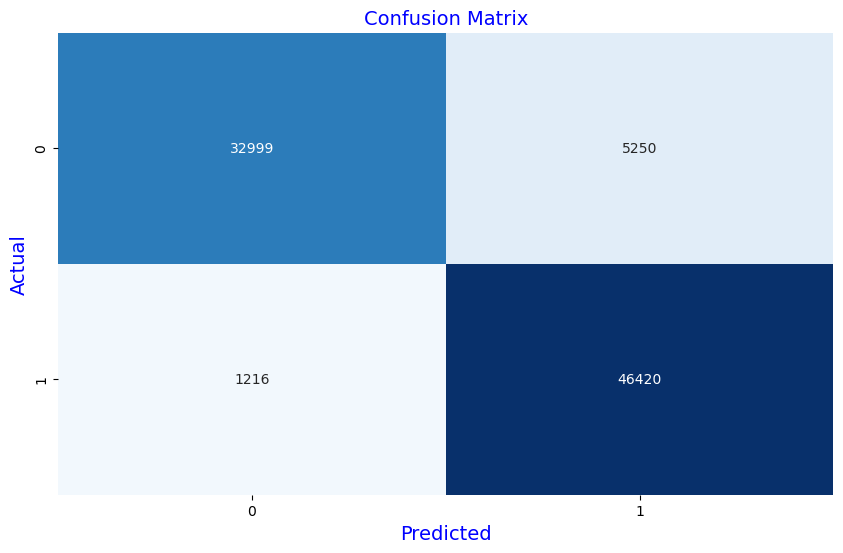

In [625]:
confmat_sgd_2 = confusion_matrix(y_valid, y_pred_test)
print('confmat_sgd_2 =>\n', confmat_sgd_2)

print('--'*30)

## Plotting as a HeatMap
plt.figure(figsize=(10, 6))
sns.heatmap(confmat_sgd_2, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.xlabel('Predicted', fontsize=14, color='b')
plt.ylabel('Actual', fontsize=14, color='b')
plt.title('Confusion Matrix', fontsize=14, color='b')
plt.show()

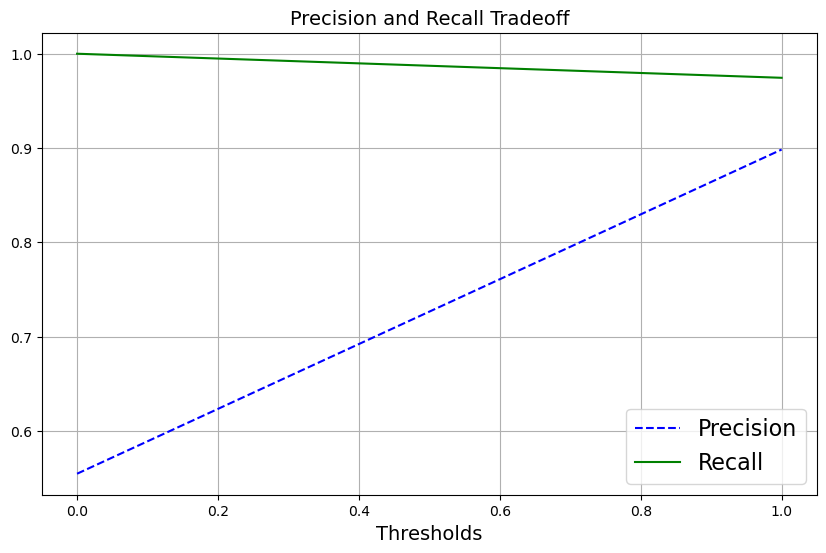

In [626]:
precision_vals, recall_vals, thresholds_vals = precision_recall_curve(y_valid, y_pred_test)
plt.figure(figsize=(10, 6))
plt.plot(thresholds_vals, precision_vals[:-1], 'b--', label='Precision')
plt.plot(thresholds_vals, recall_vals[:-1], 'g-', label='Recall')
plt.title('Precision and Recall Tradeoff', fontsize=14)
plt.xlabel('Thresholds', fontsize=14)
plt.grid()
plt.legend(fontsize=16)
plt.show()